# Naive bayes

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../Data/spam.csv", encoding="latin-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [9]:
np.sum(df[df.columns[2:]].notna())

Unnamed: 2    50
Unnamed: 3    12
Unnamed: 4     6
dtype: int64

In [15]:
df_no_NaN = df.dropna(axis=1)
df_no_NaN.columns = ["class", "content"]
df_no_NaN.head()

,class,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<AxesSubplot:xlabel='class', ylabel='count'>

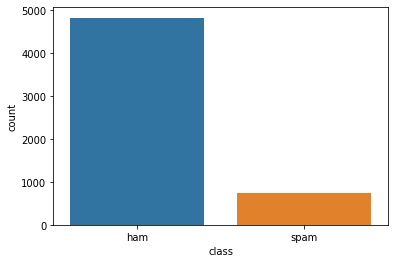

In [17]:
sns.countplot(data = df_no_NaN, x="class")

In [24]:
df_onehot = pd.get_dummies(df_no_NaN, columns=["class"], drop_first=True)
X, y = df_onehot["content"], df_onehot["class_spam"]

In [23]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: content, Length: 5572, dtype: object

## TF-IDF

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidfvectorizer = TfidfVectorizer(stop_words="english")
X_tfidif = tfidfvectorizer.fit_transform(X)
print(X_tfidif.todense())
print(repr(X_tfidif))
print(f"min value {X_tfidif.min()}, max value {X_tfidif.max()}")

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
<5572x8404 sparse matrix of type '<class 'numpy.float64'>'
	with 43478 stored elements in Compressed Sparse Row format>
min value 0.0, max value 1.0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidif, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape

((3733, 8404), (1839, 8404))

<AxesSubplot:xlabel='class_spam', ylabel='count'>

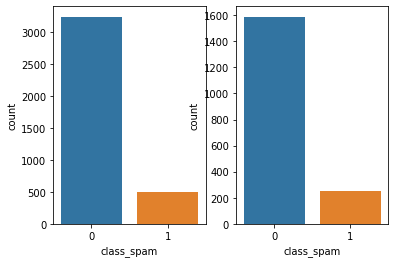

In [37]:
fig, ax = plt.subplots(1, 2)
sns.countplot(x = y_train, ax = ax[0])
sns.countplot(x = y_test, ax = ax[1])

## Naive bayes

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1587
           1       1.00      0.75      0.86       252

    accuracy                           0.97      1839
   macro avg       0.98      0.88      0.92      1839
weighted avg       0.97      0.97      0.96      1839



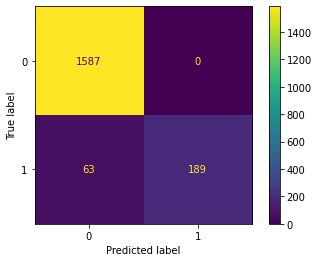

In [39]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

naive_bayes = dict(
    multinomial = MultinomialNB(),
    bernoulli = BernoulliNB(),
    complement = ComplementNB()
)

def evaluation_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()

evaluation_model(naive_bayes["multinomial"])

## precision = TP/(TP+FP)
## recall = TP/(TP+FN)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1587
           1       0.98      0.81      0.89       252

    accuracy                           0.97      1839
   macro avg       0.97      0.91      0.94      1839
weighted avg       0.97      0.97      0.97      1839



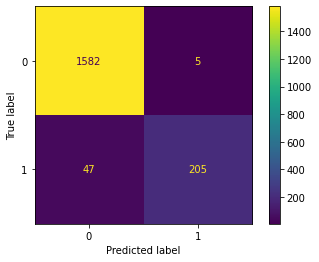

In [40]:
evaluation_model(naive_bayes["bernoulli"])

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      1587
           1       0.66      0.94      0.78       252

    accuracy                           0.93      1839
   macro avg       0.83      0.93      0.87      1839
weighted avg       0.95      0.93      0.93      1839



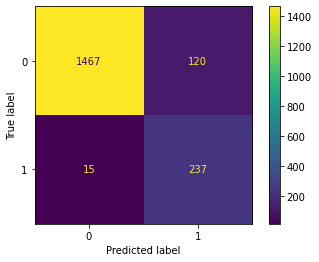

In [41]:
evaluation_model(naive_bayes["complement"])

## Some other models

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1587
           1       0.97      0.85      0.91       252

    accuracy                           0.98      1839
   macro avg       0.97      0.92      0.95      1839
weighted avg       0.98      0.98      0.98      1839



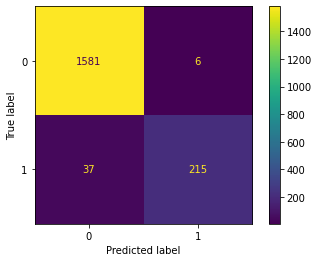

In [43]:
from sklearn.svm import LinearSVC

evaluation_model(LinearSVC())

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1587
           1       1.00      0.84      0.91       252

    accuracy                           0.98      1839
   macro avg       0.99      0.92      0.95      1839
weighted avg       0.98      0.98      0.98      1839



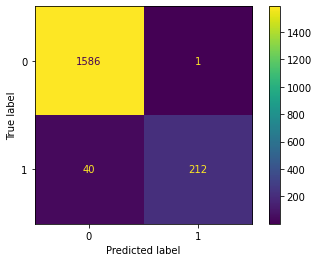

In [44]:
from sklearn.ensemble import RandomForestClassifier

evaluation_model(RandomForestClassifier())

## Combine models

- plurality vote
- class with most votes win

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1587
           1       1.00      0.85      0.92       252

    accuracy                           0.98      1839
   macro avg       0.99      0.93      0.95      1839
weighted avg       0.98      0.98      0.98      1839



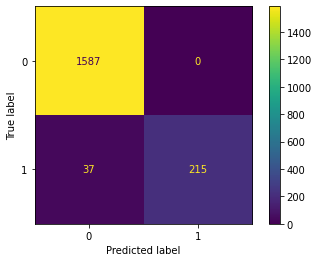

In [47]:
from sklearn.ensemble import VotingClassifier

vote_clf = VotingClassifier([
    ("rf", RandomForestClassifier()),
    ("svc", LinearSVC()),
    ("compliment", ComplementNB()),
    ("bernoulli", BernoulliNB()),
    ("multinomial", MultinomialNB())
])

evaluation_model(vote_clf)

## "Deployment"

In [48]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("tfidf", TfidfVectorizer(stop_words="english")), ("vote", vote_clf)])

pipe.fit(X, y)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('vote',
                 VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                                              ('svc', LinearSVC()),
                                              ('compliment', ComplementNB()),
                                              ('bernoulli', BernoulliNB()),
                                              ('multinomial',
                                               MultinomialNB())]))])

In [50]:
pipe.predict(["Come and collect your $1000 Bitcoins"])

array([0], dtype=uint8)

In [51]:
pipe.predict(["You will win a $1000 for free"])

array([1], dtype=uint8)

In [53]:
pipe.predict(["I am your long lost brother who is a prince and will give you $10000000 for free"])

array([0], dtype=uint8)